In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
priceZone = pd.read_csv('dataset/price_zone.csv')

In [3]:
priceZone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
store                      999 non-null object
avg_weekly_sales           999 non-null int64
price_elasticity           999 non-null float64
median_household_income    999 non-null int64
avg_weekly_txn             999 non-null float64
avg_unit_retail            999 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 46.9+ KB


In [4]:
priceZone.head()

,store,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
0,s1001,12293,-3.25,113848,585.380952,8.74
1,s1002,24606,-2.04,67687,984.240000,14.75
2,s1003,66042,-3.68,110448,7338.000000,11.55
3,s1004,64912,-2.48,39508,2704.666667,5.49
4,s1005,152239,-1.39,73039,15223.900000,8.93


In [5]:
priceZone.describe()

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
count,999.000000,999.000000,999.000000,999.000000,999.000000
mean,104166.528529,-2.623994,87370.028028,8365.742307,8.921802
std,55788.861500,0.799776,35578.135917,6702.604205,3.520830
min,10290.000000,-4.000000,25110.000000,414.720000,3.000000
25%,54387.500000,-3.300000,56908.500000,3668.365080,5.710000
50%,104843.000000,-2.620000,85138.000000,6782.380952,8.990000
75%,152671.500000,-1.960000,117500.000000,10651.753470,11.985000
max,199970.000000,-1.210000,149965.000000,39291.200000,14.990000


# # Scale the data

In [6]:
stores = priceZone['store']
priceZone_scaled = priceZone.drop(columns=['store'])
priceZone_scaled = (priceZone_scaled - priceZone_scaled.mean()) / priceZone_scaled.std()
priceZone_scaled['store'] = stores
priceZone_scaled.head() 

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail,store
0,-1.646808,-0.782727,0.744220,-1.160797,-0.051636,s1001
1,-1.426101,0.730197,-0.553234,-1.101289,1.655348,s1002
2,-0.683372,-1.320377,0.648656,-0.153335,0.746471,s1003
3,-0.703627,0.180043,-1.345265,-0.844608,-0.974714,s1004
4,0.861686,1.542925,-0.402804,1.023208,0.002328,s1005


In [7]:
priceZone.head()

,store,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
0,s1001,12293,-3.25,113848,585.380952,8.74
1,s1002,24606,-2.04,67687,984.240000,14.75
2,s1003,66042,-3.68,110448,7338.000000,11.55
3,s1004,64912,-2.48,39508,2704.666667,5.49
4,s1005,152239,-1.39,73039,15223.900000,8.93


In [8]:
from sklearn.cluster import KMeans

#select K
sse = {}
for k in range(1, 21):
    kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(priceZone_scaled.drop(columns=['store']))
    sse[k] = kmeans.inertia_ 

In [9]:
print(sse)

{1: 4989.999999999996, 2: 3845.6748755086874, 3: 3377.4303011400984, 4: 3010.864413427093, 5: 2681.091173173346, 6: 2427.5597809881697, 7: 2238.1765052676747, 8: 2063.3217727675074, 9: 1892.818985219989, 10: 1809.1520781174395, 11: 1699.447926638009, 12: 1612.587834349534, 13: 1555.9782306555303, 14: 1481.7305257243781, 15: 1421.6531687351735, 16: 1369.2387733109094, 17: 1332.0827412555923, 18: 1281.130083963368, 19: 1233.7259869098898, 20: 1217.943336398696}


Text(0,0.5,'SSE')

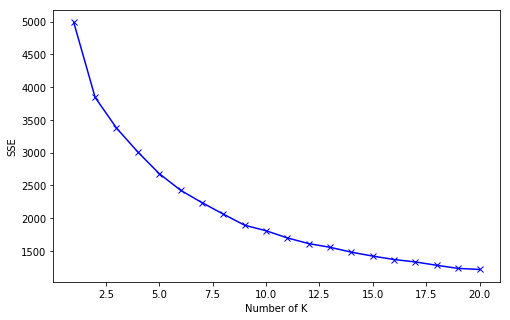

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of K")
plt.ylabel("SSE")

In [11]:
kmeans = KMeans(n_clusters=12, max_iter=2000).fit(priceZone_scaled.drop(columns=['store']))
priceZone_scaled['clusters'] = kmeans.labels_
priceZone_scaled.groupby(by=['clusters']).mean()

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
clusters,,,,,
0,0.704262,0.833290,-0.952698,0.490814,0.505858
1,-0.743740,-0.810645,0.937447,-0.510421,0.899027
2,0.274385,1.000489,0.746807,0.039252,-1.054977
3,0.571930,-0.893534,-0.713037,0.077683,-1.006022
4,-0.973875,0.852047,0.219129,-0.730512,0.893172
5,-0.482145,0.831824,-1.005139,-0.424334,-0.921344
6,-0.907735,-0.820111,-0.930724,-0.672109,0.606439
7,0.893064,-0.872362,1.046178,0.423008,-0.166315
8,0.949534,0.707512,0.973085,0.338475,0.839104


In [12]:
priceZone = pd.merge(priceZone, priceZone_scaled[['store', 'clusters']], on=['store'])
priceZone.head()

,store,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail,clusters
0,s1001,12293,-3.25,113848,585.380952,8.74,11
1,s1002,24606,-2.04,67687,984.240000,14.75,4
2,s1003,66042,-3.68,110448,7338.000000,11.55,1
3,s1004,64912,-2.48,39508,2704.666667,5.49,5
4,s1005,152239,-1.39,73039,15223.900000,8.93,0


In [13]:
priceZone.groupby(by = ['clusters']).mean()

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
clusters,,,,,
0,143456.490196,-1.957549,53474.813725,11655.474883,10.702843
1,62674.136986,-3.272329,120722.630137,4944.590017,12.087123
2,119474.135802,-1.823827,113940.037037,8628.830383,5.207407
3,136073.873563,-3.338621,62001.494253,8886.423539,5.379770
4,49835.150943,-1.942547,95166.245283,3469.410874,12.066509
5,77268.232558,-1.958721,51609.046512,5521.598777,5.677907
6,53525.020202,-3.279899,54256.585859,3860.861171,11.056970
7,153989.545455,-3.321688,124591.103896,11200.997858,8.336234
8,157139.971429,-2.058143,121990.585714,10634.403588,11.876143
